#### Creates two axis based on arbitrary y1 and y2 data that may have a complicated relationship.
Following this matplotlib example:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html

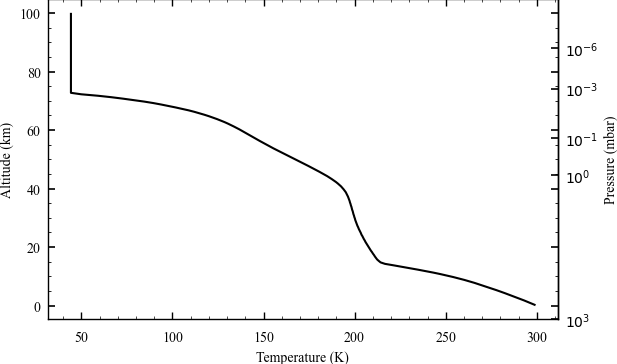

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('az-paper-twocol.mplstyle')

# Create sample x, y data, and other variation of y-data
data = pd.read_csv('data/pt_profile.csv', comment='#')
pressure = data['PRESS']*1000 # Convert bar to mbar
altitude = data['ALT']/100/1000 # Convert cm to km
temperature = data['TEMP']

# This is the magic function that converts between the two scales
def forward(y):
    return np.interp(y, altitude, pressure)

def inverse(y):
    # THE ::-1 IS TO REVERSE THE ARRAY SINCE np.interp REQUIRES THE X-VALUES TO BE IN ASCENDING ORDER
    # IF BOTH OF YOUR ARRAYS ARE IN ASCENDING ORDER, YOU CAN REMOVE THE ::-1
    # BUT SINCE PRESSURE AND ALTITUDE ARE IN DESCENDING ORDER, WE NEED TO REVERSE THEM
    return np.interp(y, pressure[::-1], altitude[::-1])


# Plot the data, with alt on left y-axis and pres on right y-axis
fig, ax1 = plt.subplots()
ax1.plot(temperature, altitude)
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Altitude (km)')

ax2 = ax1.secondary_yaxis('right', functions=(forward, inverse))
ax2.set_ylabel('Pressure (mbar)')

# THESE ARE TO MAKE THE Y-AXIS LABELS LOOK NICER
# THIS IS DUE TO DATA SPECIFIC ISSUES (THE PRESSURE SCALE IS CRAZY LARGE)
ax2.set_yticks([0.0000001,0.001, 0.1, 1., 1000.])
ax2.set_yticklabels([r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{3}$'])
ax2.minorticks_off()

plt.show()